In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df = pd.read_csv('/content/Bank_Churn_Modelling.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,9997.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,39.078223,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,13.453129,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,650.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9997 non-null   object 
 6   Age              9997 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             3
Age                3
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Gender 3 null, Age 3 null

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 4
Age                   74
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
df.shape

(10000, 14)

In [ ]:
# Fitur kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
print("Categorical Features:", categorical_features)

# Fitur numerik
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric Features:", numeric_features)

Categorical Features: Index(['Surname', 'Geography', 'Gender'], dtype='object')
Numeric Features: Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


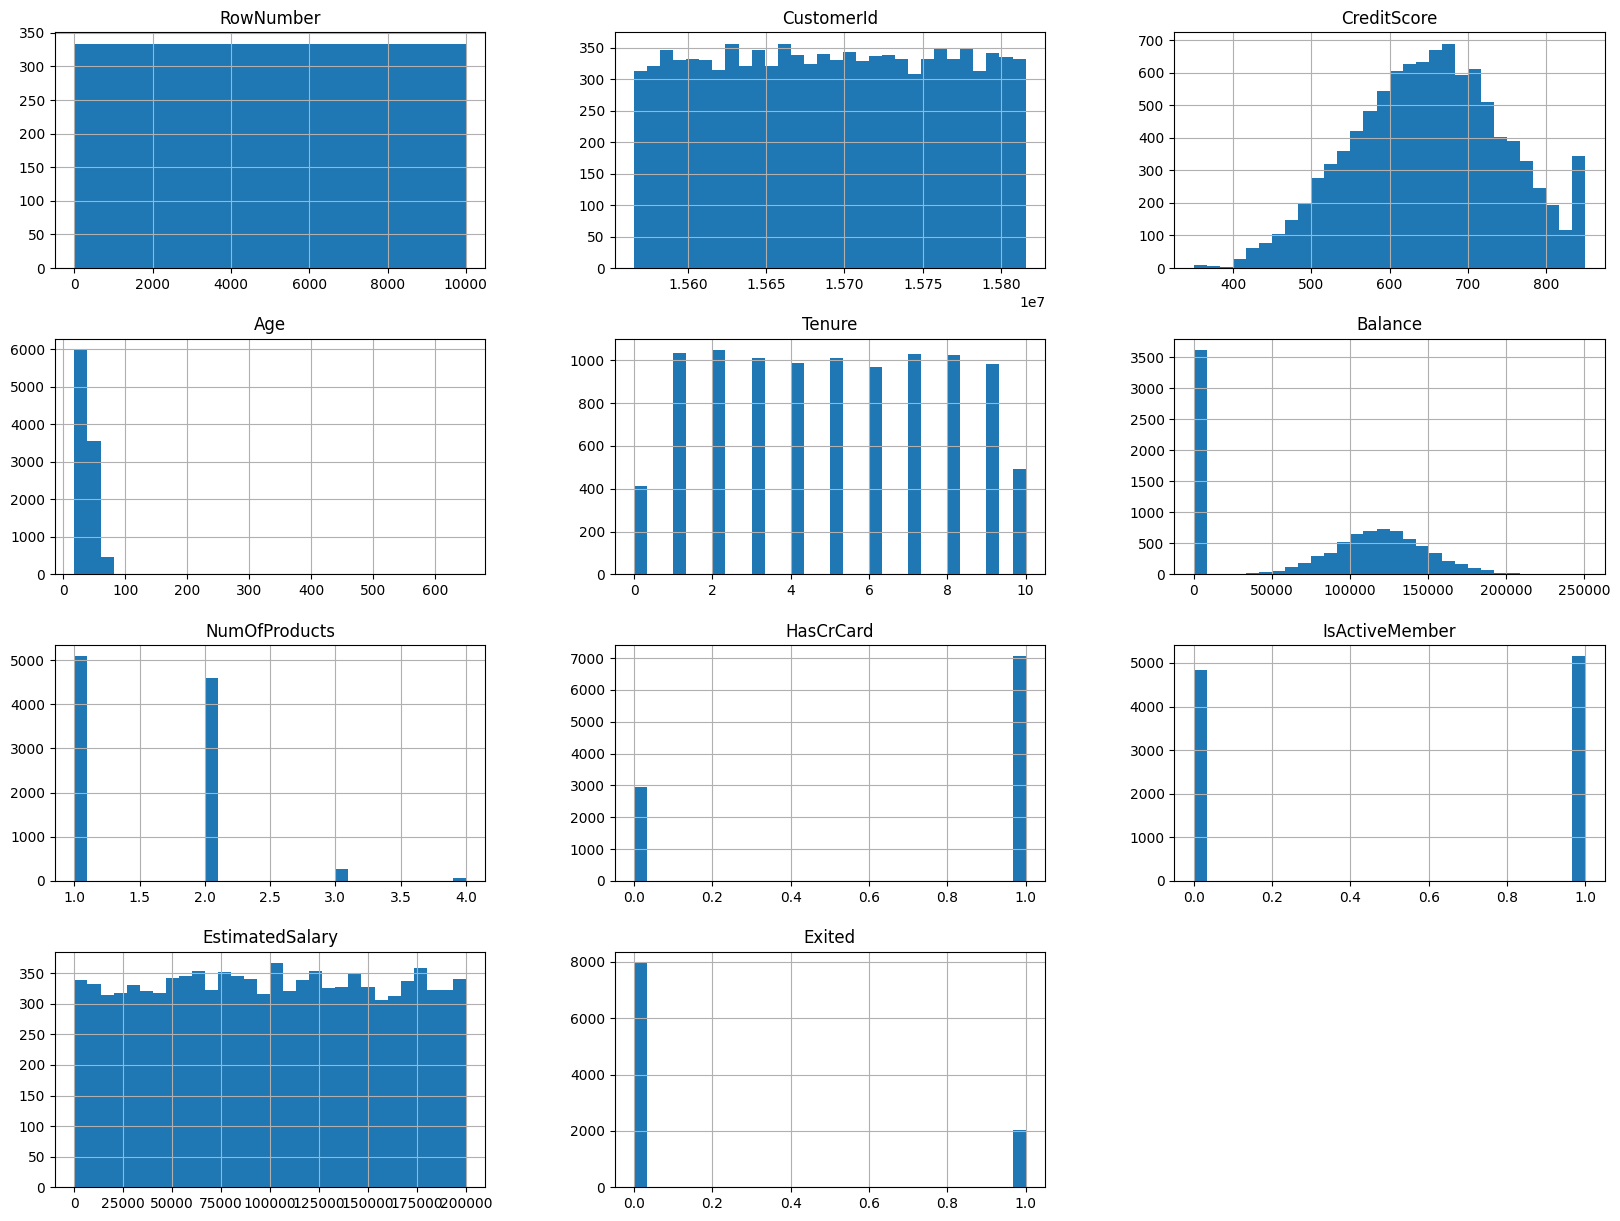

In [ ]:
# Memvisualisasikan distribusi data numerik
df.hist(bins=30, figsize=(20, 15))
plt.show()

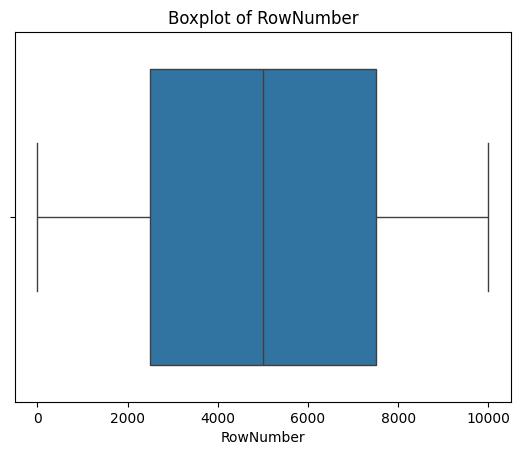

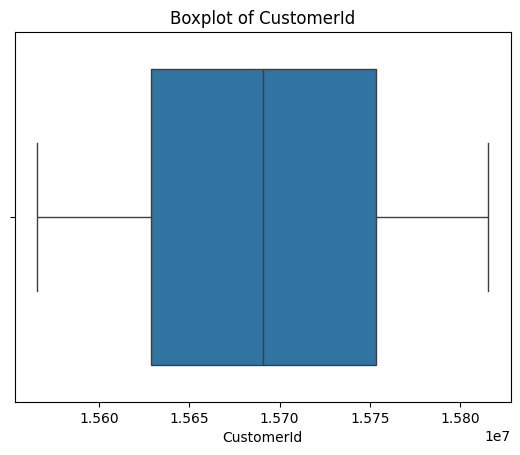

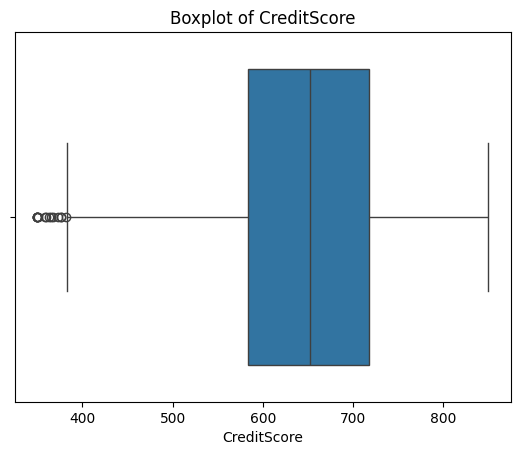

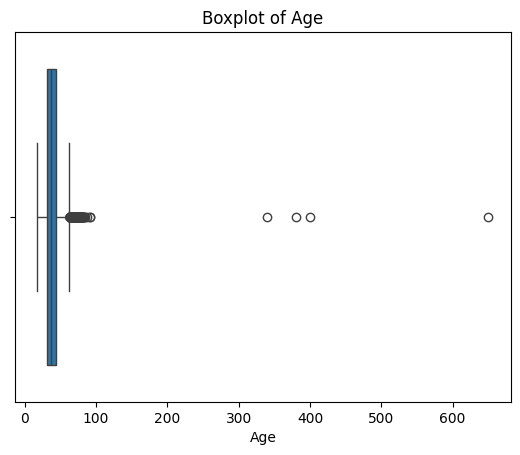

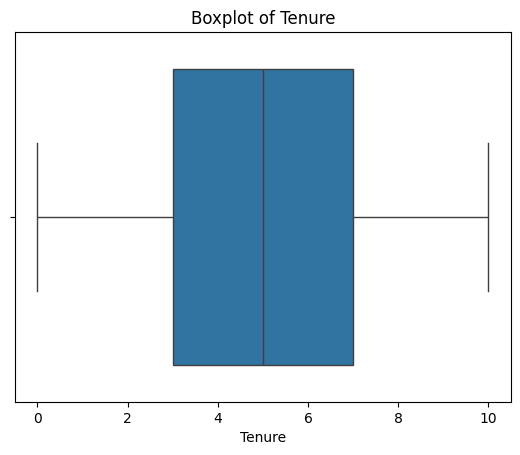

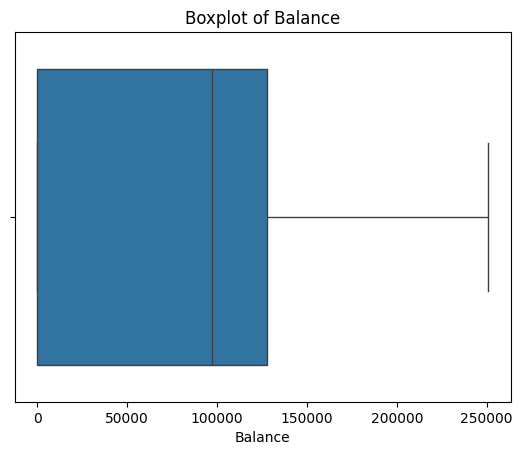

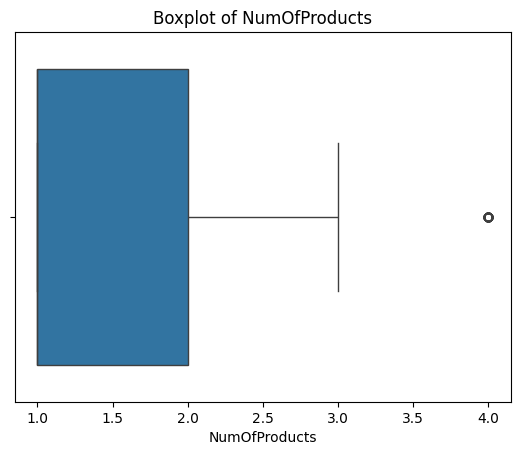

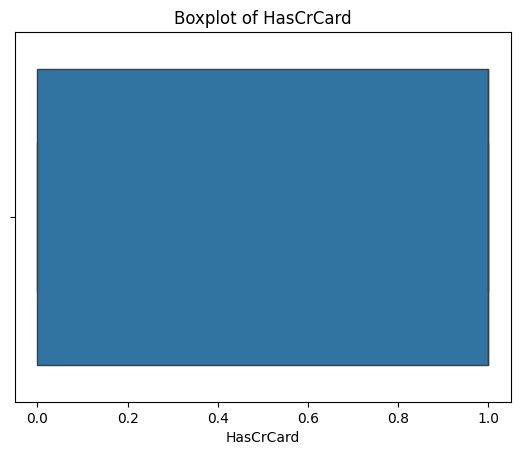

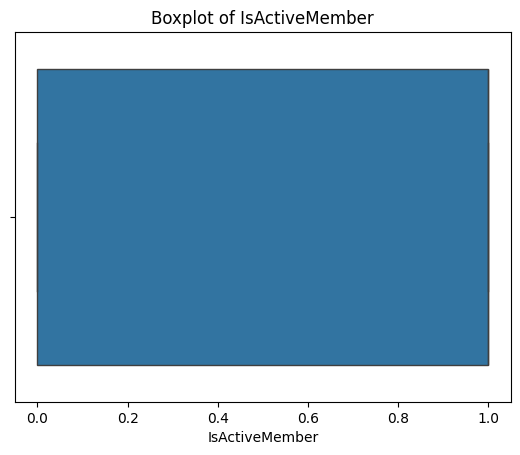

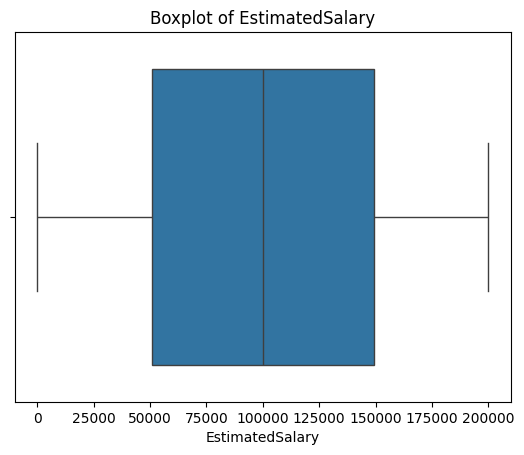

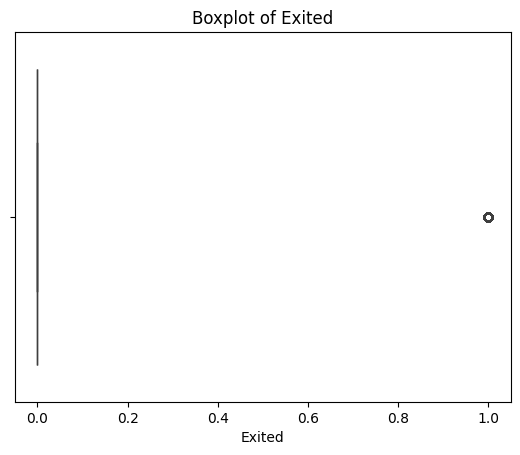

In [ ]:
# Boxplot untuk mendeteksi outliers
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

Terdapat outliers pada beberapa variabel seperti Age, CreditScore, NumOfProducts, dan Exited yang cukup signifikan.

## Data Cleaning

In [ ]:
#mengisi nilai null pada gender
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

#mengisi nilai null pada age
df['Age'].fillna(df['Age'].median(),inplace=True)

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Menangani outliers dengan median





In [ ]:
# Fungsi untuk membersihkan outliers berdasarkan IQR
def clean_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    median = df[column].median()
    outliers = (df[column] < (Q1 - 1.0 * IQR)) | (df[column] > (Q3 + 1.0 * IQR))
    df.loc[outliers, column] = median

# Membersihkan outliers untuk beberapa variabel
for column in ['Age', 'CreditScore', 'NumOfProducts']:
    clean_outliers(df, column)

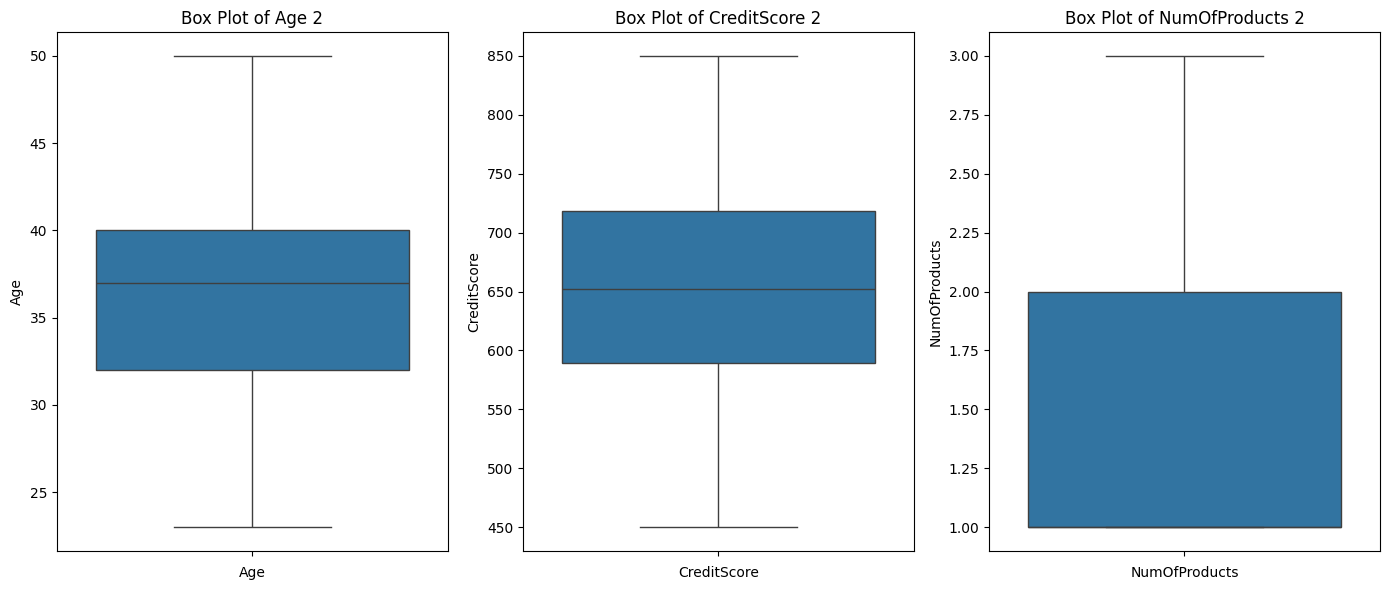

In [ ]:
plt.figure(figsize=(14, 6))

# Membuat subplot untuk tiap variabel
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Age'])
plt.title('Box Plot of Age 2')
plt.xlabel('Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['CreditScore'])
plt.title('Box Plot of CreditScore 2')
plt.xlabel('CreditScore')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['NumOfProducts'])
plt.title('Box Plot of NumOfProducts 2')
plt.xlabel('NumOfProducts')


# Menampilkan plot
plt.tight_layout()
plt.show()


## Mengkontruksi data

In [ ]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df['Gender'] = df['Gender'].replace({'M': 0, 'F': 1})

df['Gender'] = df['Gender'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 1.1+ MB


 Mengubah nilai dalam kolom kategorikal menjadi representasi numerik yang dapat diproses oleh algoritma machine learning.

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Surname', 'Geography']
le = LabelEncoder()

for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

print("Setelah Label Encoding:")
df.head()

Setelah Label Encoding:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,1,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,1,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,1,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,1,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,1,43.0,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,1507.774200,650.528800,0.746300,0.454200,37.759700,5.012800,76485.889288,1.512200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,846.204311,96.653299,0.827529,0.497923,8.641425,2.892174,62397.405202,0.550528,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,0.000000,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,773.750000,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,1542.000000,652.000000,0.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,2238.250000,718.000000,1.000000,1.000000,43.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,2931.000000,850.000000,2.000000,1.000000,62.000000,10.000000,250898.090000,3.000000,1.00000,1.000000,199992.480000,1.000000


Menghitung churn pada kolom exited

In [ ]:
jumlah_label = df['Exited'].shape[0]
churn_1 = df[df['Exited'] == 1].shape[0]
churn_0 = df[df['Exited'] == 0].shape[0]
print("Jumlah data yang digunakan untuk label :", jumlah_label)
print("Jumlah data dengan label Churn :", churn_1)
print("Jumlah data dengan label No Churn/Masih Aktif :", churn_0)

Jumlah data yang digunakan untuk label : 10000
Jumlah data dengan label Churn : 2037
Jumlah data dengan label No Churn/Masih Aktif : 7963


## Membangun Model

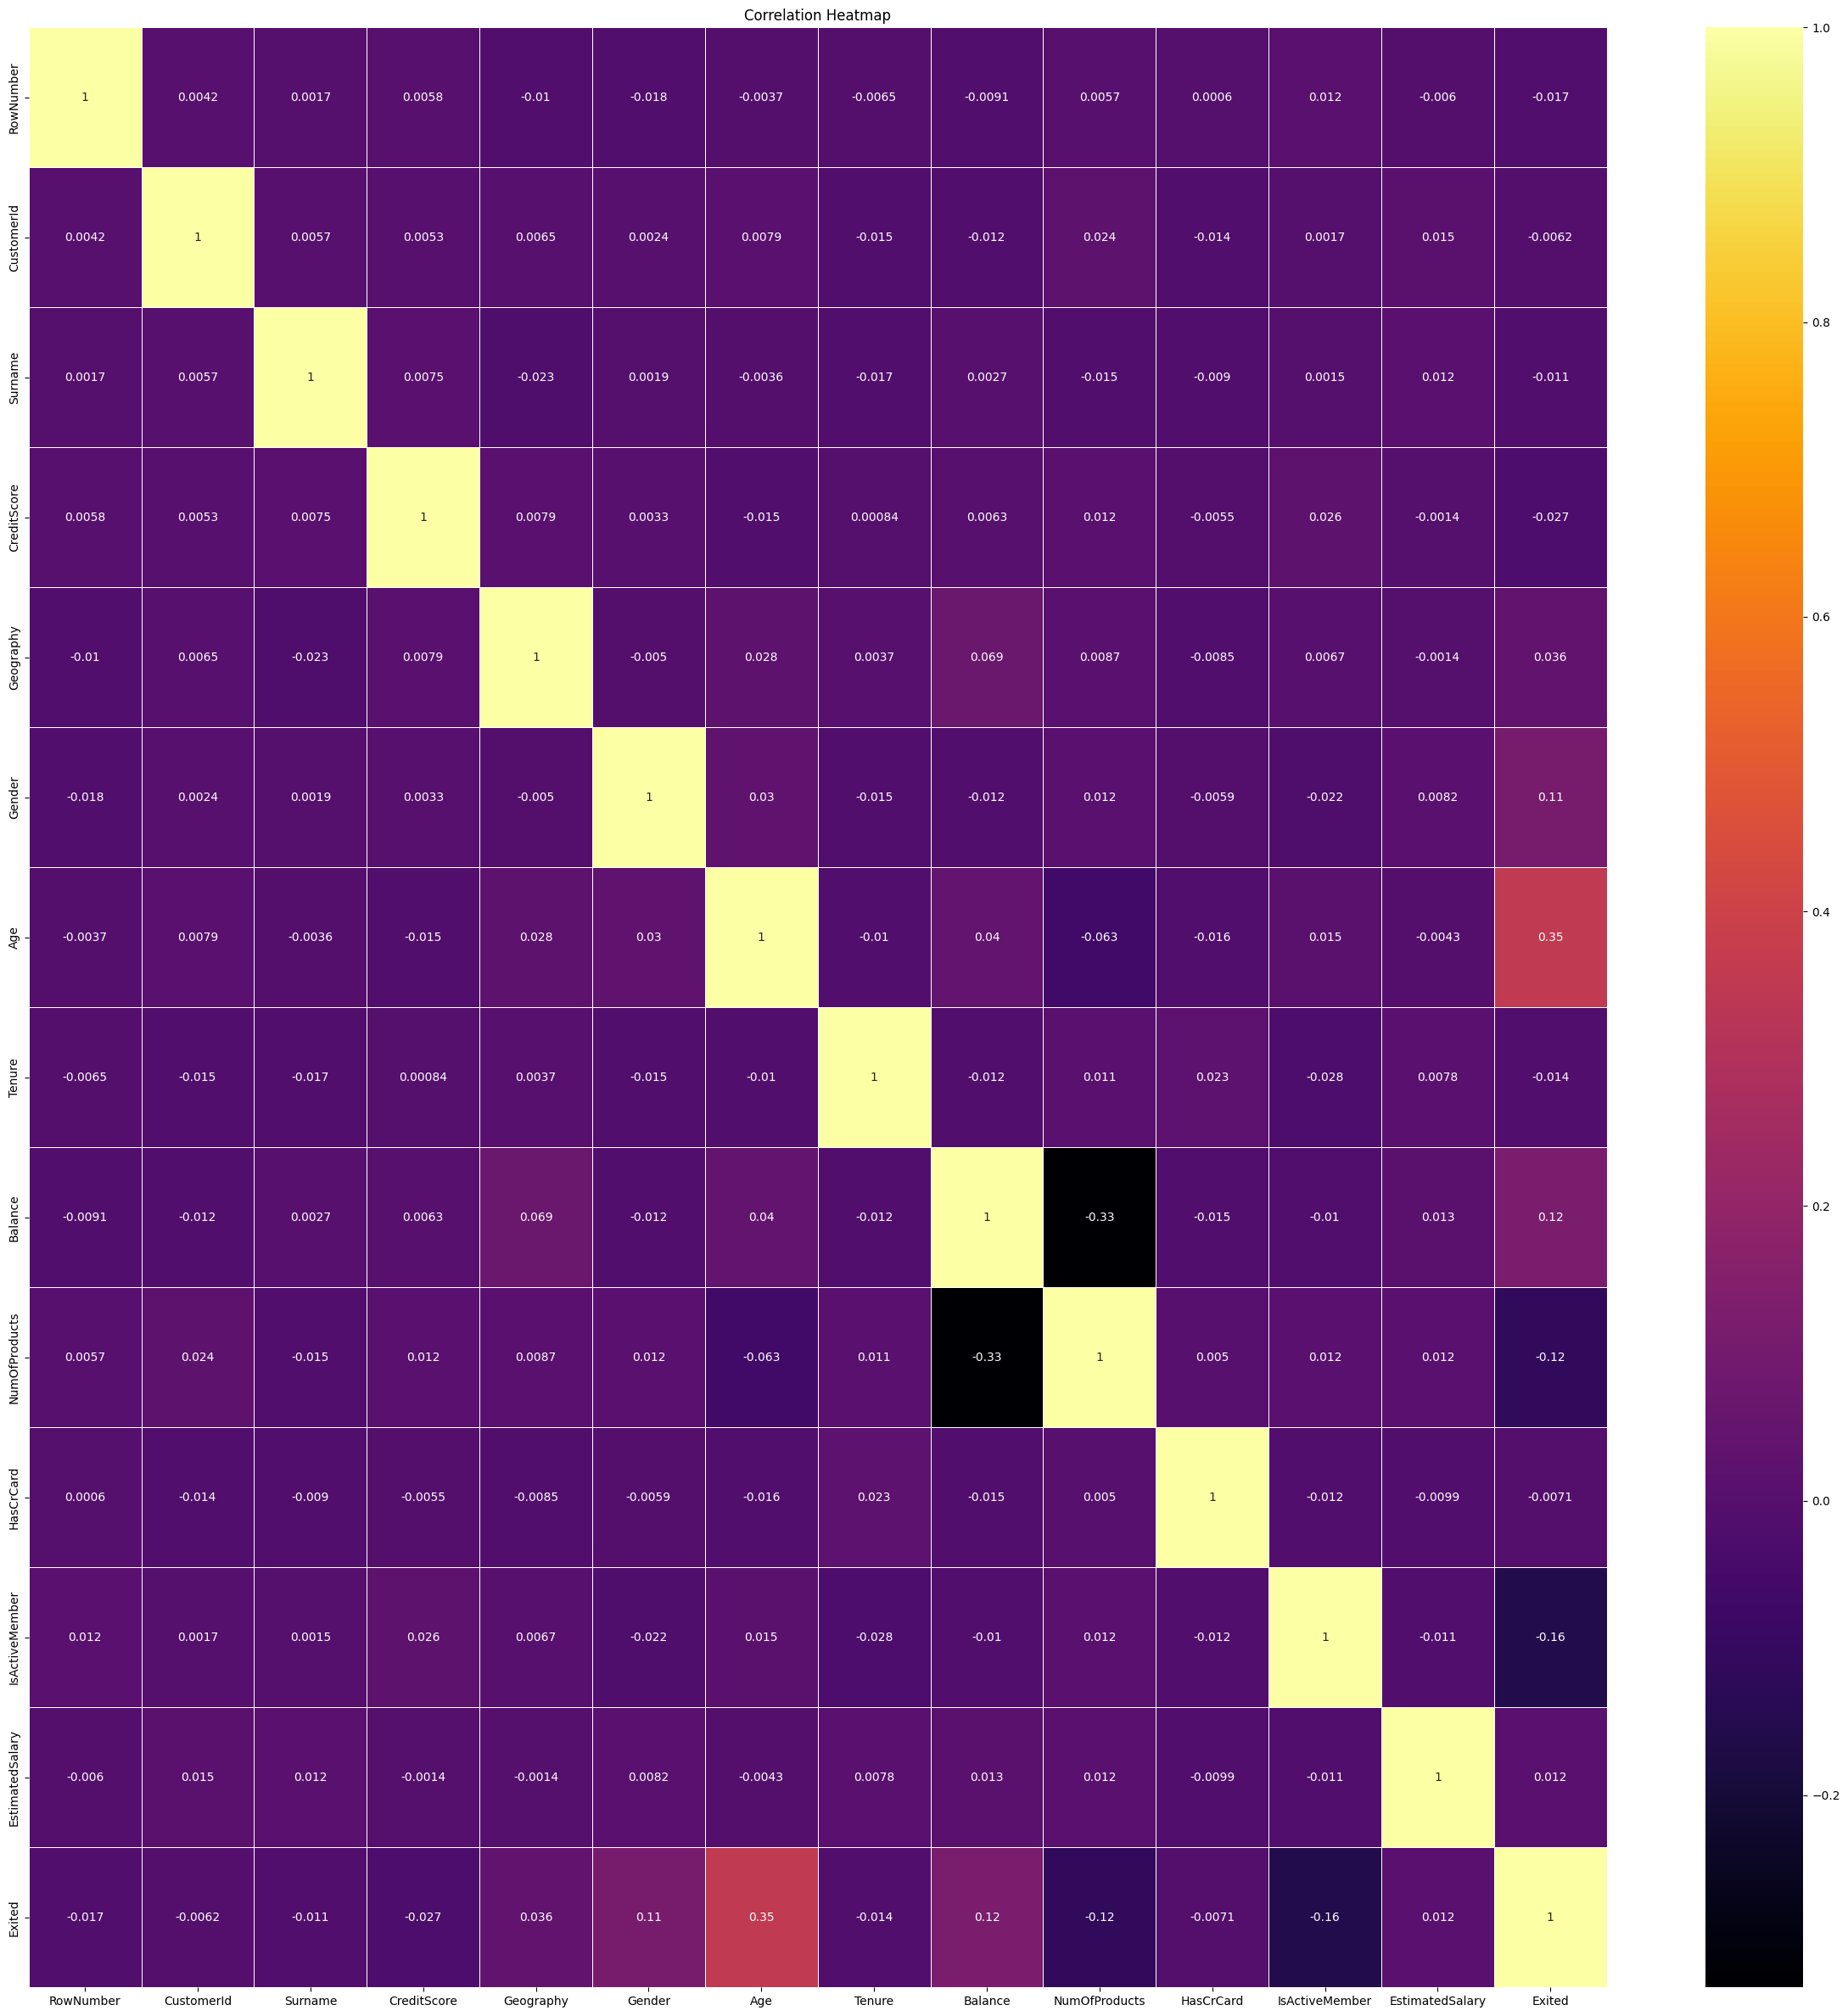

In [ ]:
corr = df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap='inferno', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

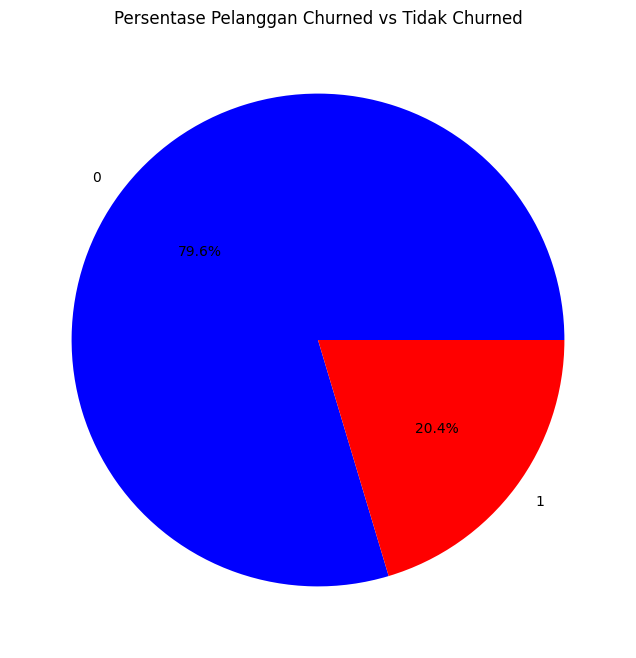

In [ ]:
# Menghitung jumlah churned dan tidak churned
churn_counts = df['Exited'].value_counts()

# Membuat diagram pie
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Persentase Pelanggan Churned vs Tidak Churned')
plt.show()

Presentase menunujukkan 20.4% pelanggan churned (keluar) sedangkan 79.6% pelanggan tidak churned (masih aktif).

In [ ]:
# Memisahkan fitur dan label (target)
X = df.drop("Exited", axis=1)  # Fitur
y = df["Exited"]  # Label (target)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("jumlah data train : ",X_train.shape[0])
print("jumlah data test : ",X_test.shape[0])

jumlah data train :  8000
jumlah data test :  2000


## Modeling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

model_dt = DecisionTreeClassifier(random_state=42)

# Melatih model menggunakan data pelatihan
model_dt.fit(X_train, Y_train)

# Membuat prediksi pada data pengujian
Y_pred_dt = model_dt.predict(X_test)

class_report_dt = classification_report(Y_test, Y_pred_dt)
conf_matrix_dt = confusion_matrix(Y_test, Y_pred_dt)

print("Classification Report Decision Tree:")
print(class_report_dt)
print("\nConfusion Matrix:")
print(conf_matrix_dt)

Classification Report Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.43      0.46      0.45       393

    accuracy                           0.77      2000
   macro avg       0.65      0.66      0.65      2000
weighted avg       0.78      0.77      0.78      2000


Confusion Matrix:
[[1367  240]
 [ 211  182]]


**Precision**: Precision mengukur seberapa banyak dari prediksi positif yang sebenarnya benar. Untuk kelas 0 (tidak churn), precision adalah 0.87, yang berarti 87% dari pelanggan yang diprediksi sebagai tidak churn benar-benar tidak churn. Untuk kelas 1 (churn), precision adalah 0.42, yang berarti 42% dari pelanggan yang diprediksi sebagai churn benar-benar churn.

**Recall**: Recall mengukur seberapa banyak dari kelas yang sebenarnya positif yang diprediksi benar oleh model. Untuk kelas 0, recall adalah 0.84, yang berarti 84% dari pelanggan yang sebenarnya tidak churn berhasil diprediksi dengan benar. Untuk kelas 1, recall adalah 0.48, yang berarti 48% dari pelanggan yang sebenarnya churn berhasil diprediksi dengan benar.

**F1-score**: F1-score adalah rata-rata harmonik dari precision dan recall. Ini memberikan keseimbangan antara precision dan recall. F1-score untuk kelas 0 adalah 0.85, sementara untuk kelas 1 adalah 0.45.

**Accuracy**: Akurasi mengukur seberapa banyak prediksi yang benar secara keseluruhan. Akurasi keseluruhan model adalah 0.77, yang berarti model ini dapat memprediksi dengan benar sekitar 77% dari keseluruhan data pengujian.

**Kesimpulan**:
*   1349 prediksi benar untuk kelas 0 (tidak churn) dan 258 prediksi salah (disebut false negative)
*   190 prediksi benar untuk kelas 1 (churn) dan 203 prediksi salah (disebut false positive)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, Y_train)
Y_pred_rf = model_rf.predict(X_test)

class_report_rf = classification_report(Y_test, Y_pred_rf)
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)

print("Classification Report Random Forest:")
print(class_report_rf)
print("\nConfusion Matrix:")
print(conf_matrix_rf)

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1607
           1       0.72      0.41      0.52       393

    accuracy                           0.85      2000
   macro avg       0.79      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000


Confusion Matrix:
[[1544   63]
 [ 232  161]]


**Confusion Matrix**: Model Random Forest menghasilkan lebih sedikit false positive (61) dan lebih banyak true negative (1546) dibandingkan dengan model Pohon Keputusan sebelumnya. Ini menunjukkan bahwa model Random Forest lebih baik dalam mengurangi kesalahan prediksi positif palsu.

## Evaluasi Model

In [ ]:
report_dt = classification_report(Y_test, Y_pred_dt, output_dict=True)
report_rf = classification_report(Y_test, Y_pred_rf, output_dict=True)
data = {
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [report_dt['accuracy'], report_rf['accuracy']],
    'Precision': [report_dt['1']['precision'], report_rf['1']['precision']],
    'Recall': [report_dt['1']['recall'], report_rf['1']['recall']],
    'F1-Score': [report_dt['1']['f1-score'], report_rf['1']['f1-score']]
}
df_eval = pd.DataFrame(data)
df_eval

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.7745,0.43128,0.463104,0.446626
1,Random Forest,0.8525,0.71875,0.409669,0.521880


Evaluasi Decision Tree

In [ ]:
feature_importance = model_dt.feature_importances_
feature_importance_dt = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# urut berdasarkan fitur dari yang paling penting hingga yang paling tidak penting
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)

print(feature_importance_dt)

            Feature  Importance
6               Age    0.207676
9     NumOfProducts    0.108730
8           Balance    0.100714
2           Surname    0.097306
12  EstimatedSalary    0.095988
1        CustomerId    0.090477
3       CreditScore    0.083575
0         RowNumber    0.076965
11   IsActiveMember    0.045673
7            Tenure    0.043563
4         Geography    0.025584
5            Gender    0.013471
10        HasCrCard    0.010277


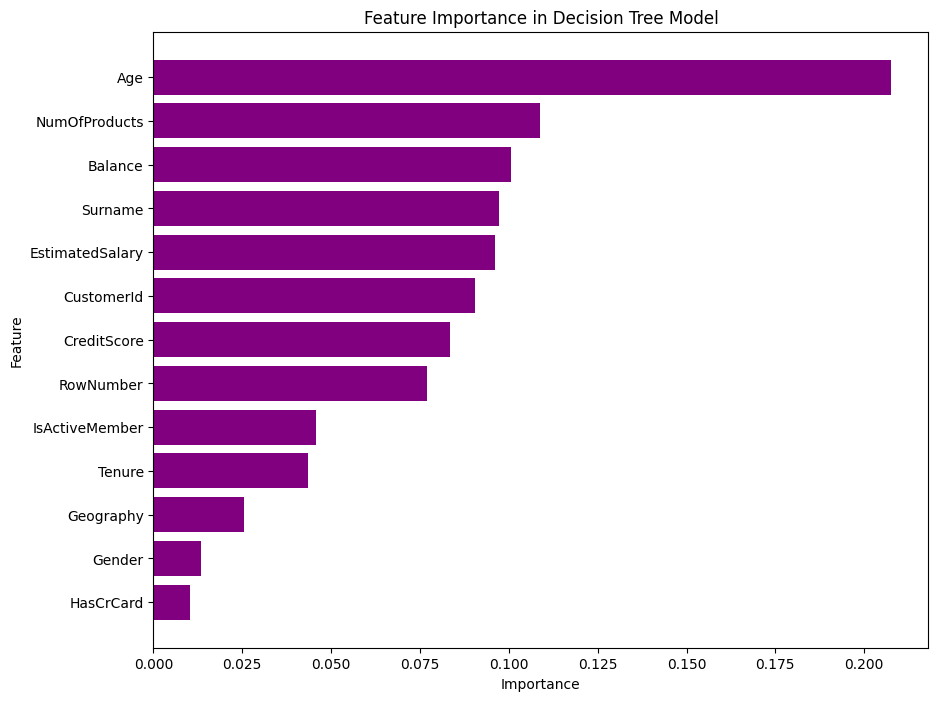

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_dt['Feature'], feature_importance_dt['Importance'], color='purple')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Model')
plt.gca().invert_yaxis()  # Mengurutkan fitur dari atas ke bawah
plt.show()

Evaluasi Random Forest

In [ ]:
feature_importance = model_rf.feature_importances_
feature_importance_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# urut berdasarkan fitur dari yang paling penting hingga yang paling tidak penting
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

print(feature_importance_rf)


            Feature  Importance
6               Age    0.200297
9     NumOfProducts    0.109534
8           Balance    0.095474
12  EstimatedSalary    0.091258
0         RowNumber    0.089497
1        CustomerId    0.089458
2           Surname    0.089450
3       CreditScore    0.089307
7            Tenure    0.053686
11   IsActiveMember    0.034270
4         Geography    0.029648
5            Gender    0.014979
10        HasCrCard    0.013143


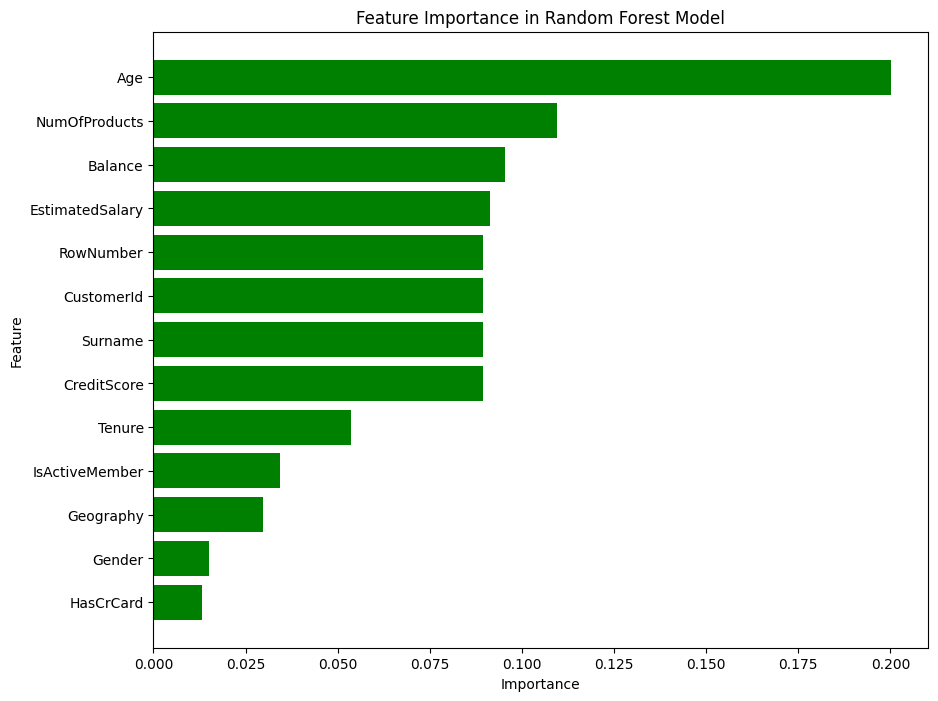

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # Mengurutkan fitur dari atas ke bawah
plt.show()